In [25]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import normalize
from nltk.tokenize import sent_tokenize, word_tokenize
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
corpus = """
Natural language processing (NLP) is a subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language. 
In particular, it is focused on how to program computers to process and analyze large amounts of natural language data. 
Challenges in natural language processing frequently involve speech recognition, natural language understanding, and natural language generation.
NLP is used to apply algorithms to identify and extract the natural language rules such that the unstructured language data is converted into a form that computers can understand.
When the text is understood, that information can be used to perform tasks such as automatic summarization, translation, named entity recognition, relationship extraction, sentiment analysis, speech recognition, and topic segmentation.
NLP algorithms are typically based on machine learning algorithms. Instead of hand-coding large sets of rules, NLP can rely on machine learning to automatically learn these rules by analyzing a set of examples (i.e., a large corpus, like a book, down to a collection of sentences).
Machine learning algorithms take large sets of data and apply statistics to learn how to perform tasks, such as language processing.
Different machine learning algorithms are used based on the task at hand and the available data.
"""

In [27]:
sentences = sent_tokenize(corpus)
tokenized_docs = [word_tokenize(sentence) for sentence in sentences]
vocab = sorted(set(word for doc in tokenized_docs for word in doc))
vocab_size = len(vocab)
word_to_id = {word: i for i, word in enumerate(vocab)}

In [28]:
def build_cooccurrence_matrix(tokenized_docs, vocab_size, word_to_id, window_size):
    cooccurrence_matrix = np.zeros((vocab_size, vocab_size), dtype=np.int32)
    
    for doc in tokenized_docs:
        for i, word in enumerate(doc):
            word_id = word_to_id[word]
            start = max(0, i - window_size)
            end = min(len(doc), i + window_size + 1)
            for j in range(start, end):
                if i != j:
                    context_word_id = word_to_id[doc[j]]
                    cooccurrence_matrix[word_id, context_word_id] += 1
                    
    return cooccurrence_matrix

In [29]:
window_size_small = 1  # Small window size
window_size_large = 3  # Large window size

cooccurrence_matrix_small = build_cooccurrence_matrix(tokenized_docs, vocab_size, word_to_id, window_size_small)
cooccurrence_matrix_large = build_cooccurrence_matrix(tokenized_docs, vocab_size, word_to_id, window_size_large)

cooccurrence_matrix_small_normalized = normalize(cooccurrence_matrix_small, norm='l1', axis=1)
cooccurrence_matrix_large_normalized = normalize(cooccurrence_matrix_large, norm='l1', axis=1)

df_small = pd.DataFrame(cooccurrence_matrix_small_normalized, index=vocab, columns=vocab)
df_large = pd.DataFrame(cooccurrence_matrix_large_normalized, index=vocab, columns=vocab)

In [30]:
def plot_cooccurrence_for_word(word, df_small, df_large):
    word_id = word_to_id[word]
    cooccurrence_small = df_small.iloc[word_id]
    cooccurrence_large = df_large.iloc[word_id]
    
    fig, axs = plt.subplots(1, 2, figsize=(14, 5))
    
    sns.barplot(x=cooccurrence_small[cooccurrence_small > 0].sort_values(ascending=False).index,
                y=cooccurrence_small[cooccurrence_small > 0].sort_values(ascending=False).values,
                ax=axs[0])
    axs[0].set_title(f"Co-occurrence with '{word}' (small window)")
    axs[0].tick_params(axis='x', rotation=90)
    
    sns.barplot(x=cooccurrence_large[cooccurrence_large > 0].sort_values(ascending=False).index,
                y=cooccurrence_large[cooccurrence_large > 0].sort_values(ascending=False).values,
                ax=axs[1])
    axs[1].set_title(f"Co-occurrence with '{word}' (large window)")
    axs[1].tick_params(axis='x', rotation=90)
    
    plt.tight_layout()
    plt.show()

**Small Window Size:**
- Captures **syntactic relationships**, focusing on immediate neighbors.
- High co-occurrence with function words (articles, prepositions) and punctuation, indicating grammatical structures.
- Examples: "natural language", "language processing" reflect close syntactic ties.

**Large Window Size:**
- Captures **semantic relationships**, considering broader context.
- Includes more diverse vocabulary, reflecting topic-level associations.
- Examples: "NLP" co-occurs with "processing", "algorithms", indicating broader topics related to NLP.


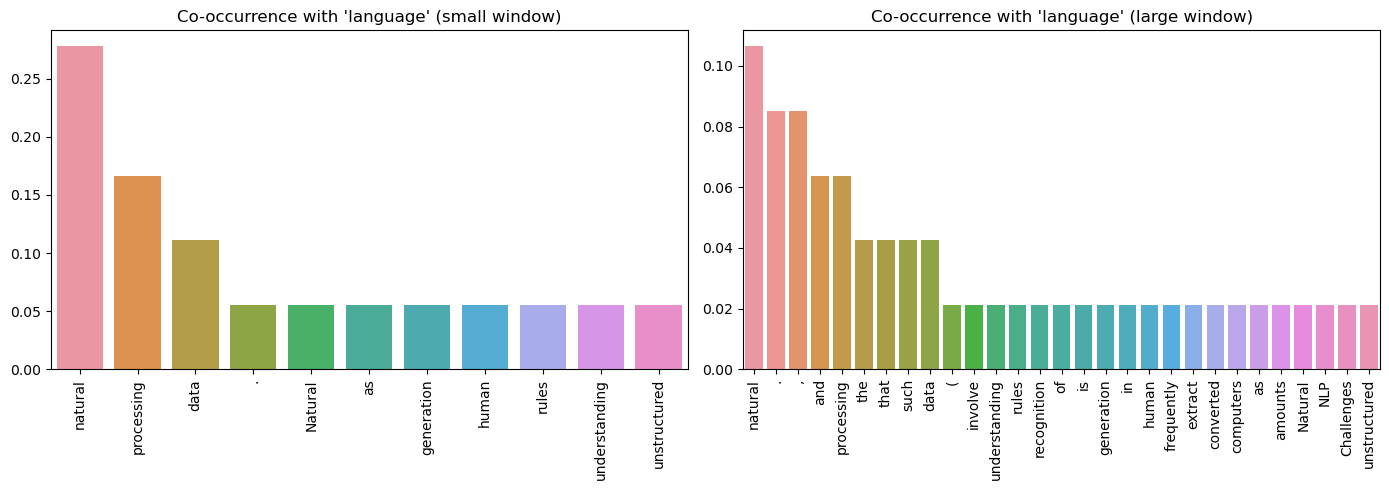

In [31]:
plot_cooccurrence_for_word("language", df_small, df_large)

**Small Window:**
- **"natural"**: High co-occurrence due to the frequent phrase "natural language".
- **"processing"**: Frequently appears as "language processing".
- **"data"**: Co-occurs in contexts discussing "language data".
- Other words like "human", "rules", "understanding" show lower but significant co-occurrence, indicating they appear nearby but less frequently.

**Large Window:**
- **"natural"**: Still high, showing its strong association with "language".
- **"processing"**, **"data"**: Maintain high co-occurrence, indicating semantic relationships.
- Words like "understanding", "rules", "recognition" appear more, reflecting broader context usage.
- Articles and common words ("the", "and") also appear, which are less informative syntactically but show up due to the larger window.


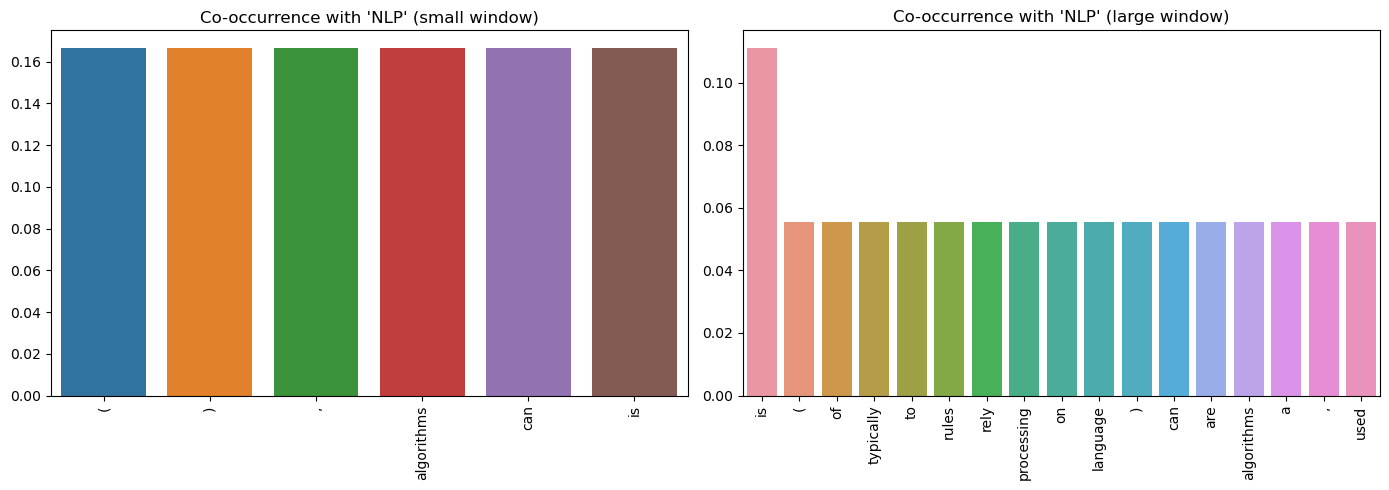

In [32]:
plot_cooccurrence_for_word("NLP", df_small, df_large)

**Small Window:**
- **Punctuation marks ("(", ")")**: High co-occurrence due to syntactic structures in the text.
- **"algorithms", "can", "is"**: Frequently appear next to "NLP" in discussions about what NLP can do and the algorithms used.

**Large Window:**
- **"is"**: High co-occurrence, often in sentences like "NLP is".
- **"of", "typically", "to"**: Commonly co-occur in broader contexts.
- **"processing", "algorithms", "used"**: Reflect tasks and applications associated with NLP.


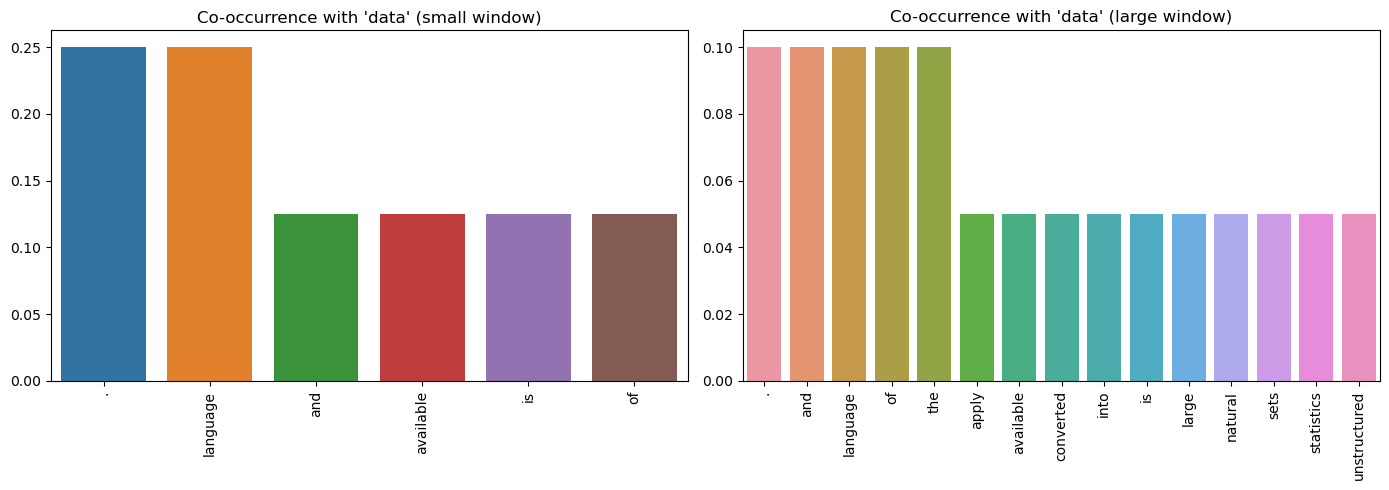

In [33]:
plot_cooccurrence_for_word("data", df_small, df_large)

**Small Window:**
- **Punctuation marks (".", ",")**: High due to syntactic usage in the text.
- **"language", "and", "available", "is"**: Frequently occur in sentences discussing data availability and language data.

**Large Window:**
- **"and", "language", "of"**: Indicate broader contexts discussing data.
- **"apply", "available", "converted"**: Reflect tasks involving data, such as applying algorithms to data and data conversion.
- **Common words ("the", "is")**: Appear due to the larger window capturing broader sentence structure.
